In [7]:
def file_len(fname):
  with open(fname) as f:
    for i, l in enumerate(f):
      pass
  return i + 1

num_classes = file_len('data/_classes.txt')
print(num_classes)

3


In [8]:
!nvidia-smi

Thu Apr 15 17:46:04 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.33.01    Driver Version: 440.33.01    CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce RTX 208...  On   | 00000000:01:00.0  On |                  N/A |
| 35%   30C    P8    35W / 260W |   2667MiB / 11016MiB |      6%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [11]:
#start training
#-b batch size (you should keep this low (2-4) for training to work properly)
#-s number of subdivisions in the batch, this was more relevant for the darknet framework
#-l learning rate
#-g direct training to the GPU device
#pretrained invoke the pretrained weights that we downloaded above
#classes - number of classes
#dir - where the training data is
#epoch - how long to train for
import datetime

starttime = datetime.datetime.now()

#!python train.py -b 4 -s 1 -l 0.001 -g 0 -pretrained ./yolov4.conv.137.pth -classes {num_classes} -dir ./train -epochs 300
!python train.py -b 64 -s 4 -l 0.01 -g 0 -pretrained ./yolov4.conv.137.pth -classes {num_classes} -dir ./train -epochs 600

endtime = datetime.datetime.now()
print(endtime - starttime)

log file path:log/log_2021-04-15_17-47-58.txt
2021-04-15 17:47:58,077 train.py[line:458] INFO: Using device cuda
Start Traing
2021-04-15 17:48:00,495 train.py[line:298] INFO: Starting training:
        Epochs:          600
        Batch size:      64
        Subdivisions:    4
        Learning rate:   0.01
        Training size:   816
        Validation size: 0
        Checkpoints:     True
        Device:          cuda
        Images size:     224
        Optimizer:       adam
        Dataset classes: 3
        Train label path:train.txt
        Pretrained:
    
Epoch 1/600: 100%|█| 816/816 [00:41<00:00, 19.46im
Epoch 2/600:  55%|▌| 448/816 [00:26<00:19, 19.34im/home/stockchicken/miniconda3/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:231: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "
2021-04-15 17:49:09,945 train.py[line:370] INFO: Train step_80: 

In [3]:
import matplotlib.pyplot as plt
import numpy as np

#loss, loss xy, loss wh, loss obj, loss cls, loss l2
loss_file = open('loss.txt', 'r')
loss = []
loss_xy = []
loss_wh = []
loss_obj = []
loss_cls = []
loss_l2 = []
count = 0

for line in loss_file.readlines():
    loss.append(float(line.split(" ")[0]))
    loss_xy.append(float(line.split(" ")[1]))
    loss_wh.append(float(line.split(" ")[2]))
    loss_obj.append(float(line.split(" ")[3]))
    loss_cls.append(float(line.split(" ")[4]))
    loss_l2.append(float(line.split(" ")[5]))
    count+=1

#print(count)
train_step = np.arange(1, count+1)
loss = np.array(loss)
loss_xy = np.array(loss_xy)
loss_wh = np.array(loss_wh)
loss_obj = np.array(loss_obj)
loss_cls = np.array(loss_cls)
loss_l2 = np.array(loss_l2)


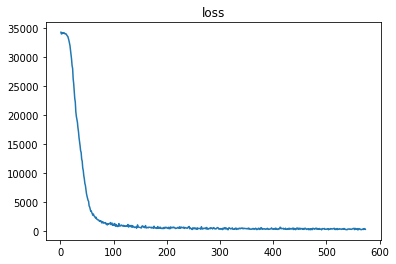

In [4]:
%matplotlib inline
plt.title("loss")
plt.plot(train_step, loss)

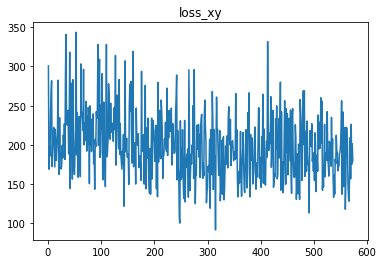

In [5]:
plt.title("loss_xy")
plt.plot(train_step, loss_xy)

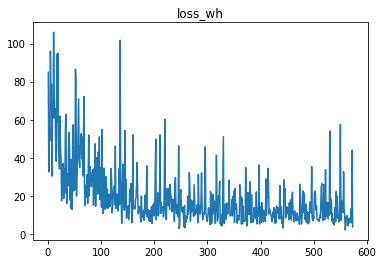

In [6]:
plt.title("loss_wh")
plt.plot(train_step, loss_wh)

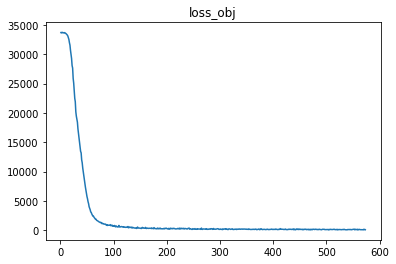

In [7]:
plt.title("loss_obj")
plt.plot(train_step, loss_obj)

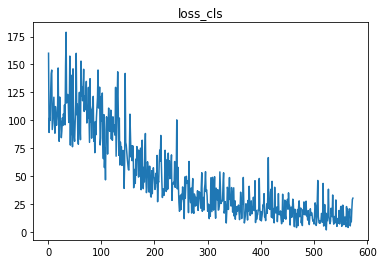

In [8]:
plt.title("loss_cls")
plt.plot(train_step, loss_cls)

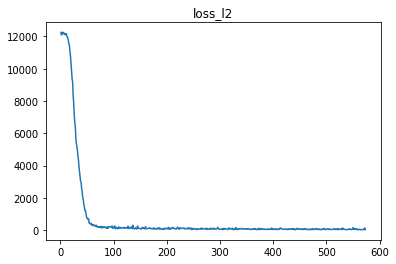

In [9]:
plt.title("loss_l2")
plt.plot(train_step, loss_l2)

In [10]:
#looking at the weights that our model has saved during trainingclass_names[cls_id],
!ls checkpoints

Yolov4_epoch100.pth  Yolov4_epoch370.pth  Yolov4_epoch640.pth
Yolov4_epoch10.pth   Yolov4_epoch380.pth  Yolov4_epoch650.pth
Yolov4_epoch110.pth  Yolov4_epoch390.pth  Yolov4_epoch660.pth
Yolov4_epoch120.pth  Yolov4_epoch400.pth  Yolov4_epoch670.pth
Yolov4_epoch130.pth  Yolov4_epoch40.pth   Yolov4_epoch680.pth
Yolov4_epoch140.pth  Yolov4_epoch410.pth  Yolov4_epoch690.pth
Yolov4_epoch150.pth  Yolov4_epoch420.pth  Yolov4_epoch700.pth
Yolov4_epoch160.pth  Yolov4_epoch430.pth  Yolov4_epoch70.pth
Yolov4_epoch170.pth  Yolov4_epoch440.pth  Yolov4_epoch710.pth
Yolov4_epoch180.pth  Yolov4_epoch450.pth  Yolov4_epoch720.pth
Yolov4_epoch190.pth  Yolov4_epoch460.pth  Yolov4_epoch730.pth
Yolov4_epoch200.pth  Yolov4_epoch470.pth  Yolov4_epoch740.pth
Yolov4_epoch20.pth   Yolov4_epoch480.pth  Yolov4_epoch750.pth
Yolov4_epoch210.pth  Yolov4_epoch490.pth  Yolov4_epoch760.pth
Yolov4_epoch220.pth  Yolov4_epoch500.pth  Yolov4_epoch770.pth
Yolov4_epoch230.pth  Yolov4_epoch50.pth   Yolov4_epoch780.pth
Yolov4_ep

In [ ]:
#choose random test image
import os
test_images = [f for f in os.listdir('test') if f.endswith('.jpg')]
import random
img_path = "test/" + random.choice(test_images);

In [20]:
def file_len(fname):
  with open(fname) as f:
    for i, l in enumerate(f):
      pass
  return i + 1

num_classes = file_len('data/_classes.txt')
print(num_classes)

3


In [30]:
##change the epoch here to the one you would like to use for inference
import datetime
starttime = datetime.datetime.now()
num_classes = 3
#!python models.py {num_classes} checkpoints/Yolov4_epoch300.pth train/ad6f8bfc-f610-441f-ac7d-39e58a19a460.jpg  data/_classes.txt
!python models.py {num_classes} checkpoints/Yolov4_epoch300.pth test/5b01e3a1-3302-4e01-8bdc-4424dace50d3.jpg data/_classes.txt
endtime = datetime.datetime.now()
print(endtime - starttime)

Model Start!!
save plot results to predictions.jpg
Model End!!
0:00:03.314308


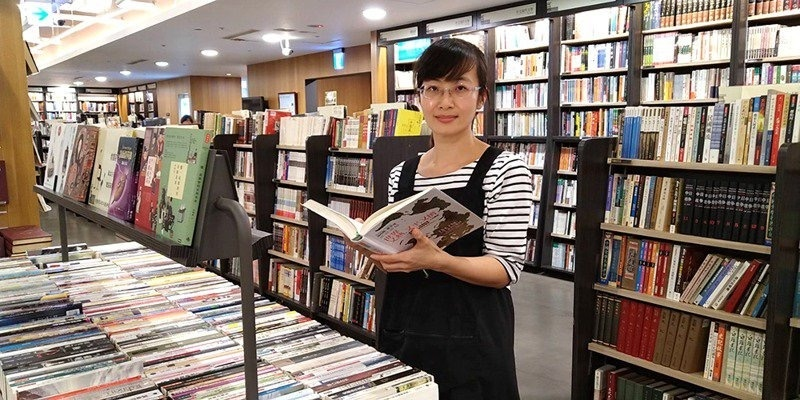

In [31]:
#visualize inference
from IPython.display import Image
Image('predictions.jpg')